In [9]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [10]:
# Download the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs0=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 1.5273 - accuracy: 0.4418 - val_loss: 1.3064 - val_accuracy: 0.5231
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1785 - accuracy: 0.5827 - val_loss: 1.0579 - val_accuracy: 0.6273
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0216 - accuracy: 0.6428 - val_loss: 1.0163 - val_accuracy: 0.6372
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9148 - accuracy: 0.6799 - val_loss: 0.9792 - val_accuracy: 0.6587
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8294 - accuracy: 0.7086 - val_loss: 0.8933 - val_accuracy: 0.6903
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7677 - accuracy: 0.7293 - val_loss: 0.9058 - val_accuracy: 0.6866
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7086 - accuracy: 0.7514 - val_loss: 0.8606 -

In [7]:
from matplotlib import pyplot as plt

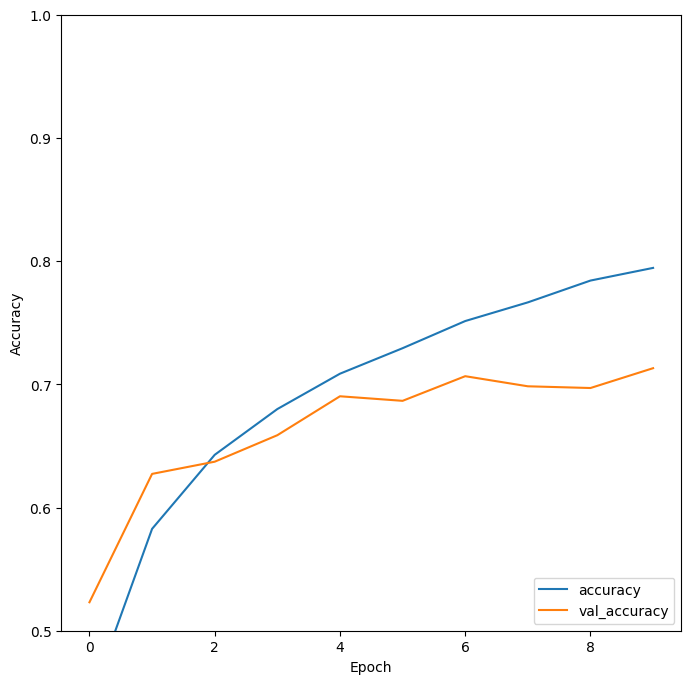

In [8]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")

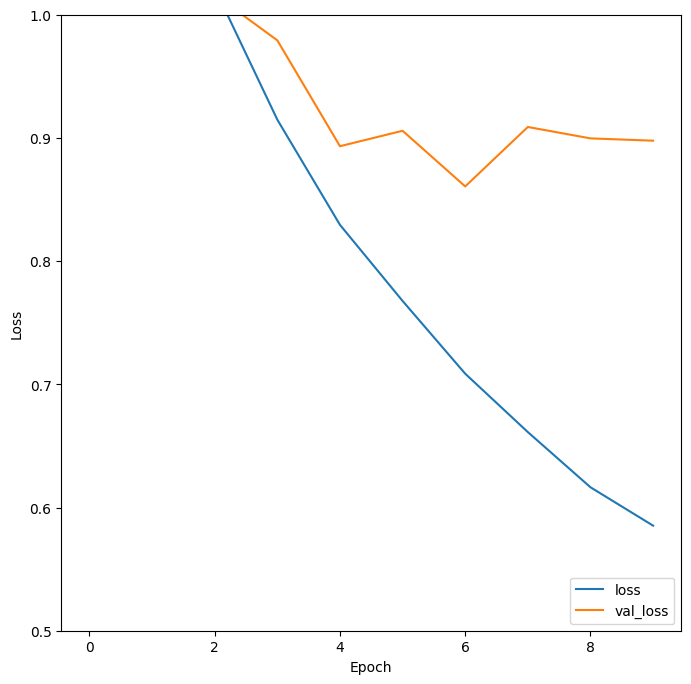

In [11]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_loss_report.png")